# Data Bootcamp: Final Project

## Table of Contents <br>
#### [Introduction](#Introduction)<br>
#### [Data Import](#Data_Import)<br>
#### [Data Cleaning](#Data_Cleaning)<br>
#### [Data Exploration, Visualization, and Analysis](#Data_Exploration_and_Visualization)<br>

### <a name="Introduction"></a>Introduction 

This project examines publically available Major League Baseball data from 1985 through 2018.  The dataset includes attendance figures, final scores, game times, and more for each major league game played over this period.  

We begin by scraping game logs for each MLB team from 1985 through 2018 from baseballreference.com, a popular repository for baseball statistics.  After cleaning the data, we explore and visualize it to identify interesting trends and developments.

### <a name="Data_Import"></a>Data Import

In [1]:
###import key packages

import pandas as pd
import numpy as np
import pdb
import requests
from lxml import etree
from lxml import html
import csv

In [2]:
###scrape data from baseball reference to csv

###NOTE: this script takes roughly 20 minutes to run; we've included the resulting csv 
###with our submission, so if you'd like to avoid running this script, just save
###the csv locally and skip to the next cell.

years = range(1985,2019) #years for which we will scrape data

#list of MLB teams active since 1985
mlb_teams = ['ARI','ATL','BAL','BOS','CHC','CHW',
            'CIN','CLE','COL','DET','HOU','KCR',
            'LAA','LAD','FLA','MIL','MIN','NYM',
            'NYY','OAK','PHI','PIT','SDP','SFG',
            'SEA','STL','TBR','TEX','TOR','WSN',
            'MON','CAL','ANA','TBD','MIA']

#csv file to store the scraped data
with open('mlb_data.csv', mode='w') as mlb_data:
    writer = csv.writer(mlb_data, delimiter=',')
    writer.writerow(['Year','Game_No','Date','Boxscore','Team','Opponent',
                    'W/L','Runs','Runs_Allowed','Record',
                   'Rank','GB','Winning_P','Losing_P','Time',
                   'D/N','Attendance','Streak','Home/Away'])
    
    #loop through every team and year 
    for year in years:

        for team in mlb_teams:

            url = 'https://www.baseball-reference.com/teams/{}/{}-schedule-scores.shtml'.format(team,year)
            res = requests.get(url)
            content = res.content
            etree = html.fromstring(content)
            
            #get the the number of rows in the BR table
            num_trs = len(etree.xpath("//tbody//tr"))
            
            #loop through each of the rows in the BR table
            for tr in range(0,num_trs):
                
                row = etree.xpath("//tbody//tr[{}]//text()".format(tr))

                #skip blank rows
                if len(row)==0 or row[1]=='Gm#':
                    continue

                #standardize the rows to account for occassional issues
                for i in row:
                    if '@' in i:
                        row.remove(i)
                        row.insert(25,'Away')

                    if '(' in i or '&' in i:
                        row.remove(i)

                if '-' not in row[8]:
                    del row[8]

                if ':' not in row[13]:
                    del row[13]
                
                #add the year to each row
                row.insert(0,year)
                
                #write the row to csv
                writer.writerow(row)

In [2]:
###import the csv file into a pandas dataframe

df = pd.read_csv("/Users/jonahlevavi/Desktop/mlb_data.csv")
#df = pd.read_csv("C:/Users/eiich/Documents/Data_Bootcamp/Final Project/mlb_data.csv")
#df = pd.read_csv("/Users/jbell/Documents/Data_Bootcamp/mlb_data.csv")
df

,Year,Game_No,Date,Boxscore,Team,Opponent,W/L,Runs,Runs_Allowed,Record,Rank,GB,Winning_P,Losing_P,Time,D/N,Attendance,Streak,Home/Away
0,1985,1,"Tuesday, Apr 9",boxscore,ATL,PHI,W,6,0,1-0,1,Tied,Mahler,Carlton,2:26,N,"35,361",+,Away
1,1985,2,"Thursday, Apr 11",boxscore,ATL,PHI,W,6,3,2-0,1,up 0.5,Smith,Denny,2:34,N,"17,987",++,Away
2,1985,3,"Friday, Apr 12",boxscore,ATL,SDP,L,3,7,2-1,1,Tied,Hawkins,Camp,2:26,N,"45,389",-,NaN
3,1985,4,"Saturday, Apr 13",boxscore,ATL,SDP,W-wo,7,5,3-1,1,up 0.5,Sutter,Stoddard,2:57,D,"23,294",+,NaN
4,1985,5,"Sunday, Apr 14",boxscore,ATL,SDP,W,3,1,4-1,1,up 1.0,Mahler,Hoyt,1:49,D,"19,519",++,NaN
5,1985,6,"Monday, Apr 15",boxscore,ATL,CIN,L,8,9,4-2,1,up 0.5,Stuper,Perez,2:51,N,"7,404",-,NaN
6,1985,7,"Tuesday, Apr 16",boxscore,ATL,CIN,L,1,2,4-3,1,Tied,Soto,Camp,2:14,N,"15,175",--,NaN
7,1985,8,"Wednesday, Apr 17",boxscore,ATL,CIN,L,1,6,4-4,3,0.5,Browning,Bedrosian,2:08,D,"13,513",---,NaN
8,1985,9,"Friday, Apr 19",boxscore,ATL,HOU,W,9,5,5-4,2,0.5,Mahler,Ryan,2:27,N,"22,067",+,NaN
9,1985,10,"Saturday, Apr 20",boxscore,ATL,HOU,L,1,8,5-5,3,1.5,Niekro,Perez,2:23,N,"32,887",-,NaN


### <a name="Data_Cleaning"></a>Data Cleaning

In [3]:
# the scraper didn't account for ties, which left blanks in the Winning_P 
# and Losing_P columns (ties don't have winning pitchers), and shifted subsequent
# values in those rows to the left, leaving them in wrong columns.  this code fixes
# that issue

df['Home/Away'] = np.where((df['W/L'] == 'T'), 
                           df['D/N'], 
                           df['Home/Away'])

df['Streak'] = np.where((df['W/L'] == 'T'), 
                        df['Time'], 
                        df['Streak'])


df['Time'] = np.where((df['W/L'] == 'T'), 
                      df['Winning_P'], 
                      df['Time'])

df['D/N'] = np.where((df['W/L'] == 'T'), 
                     df['Losing_P'], 
                     df['D/N'])

df['Winning_P'] = np.where((df['W/L'] == 'T'), 
                           np.nan, 
                           df['Winning_P'])

df['Losing_P'] = np.where((df['W/L'] == 'T'), 
                          np.nan, 
                          df['Losing_P'])

In [4]:
# some games don't have attendance figures available, which shifted subsequent
# values in those rows to the left, leaving them in wrong columns.  this code fixes
# that issue

string_list =[]
for i in range(1,12):
    string_list.append('+'*i)
    string_list.append('-'*i)

for string in string_list:

    df['Home/Away'] = np.where((df['Attendance']==string), 
                               df['Streak'], 
                               df['Home/Away'])

    df['Streak'] = np.where((df['Attendance']==string), 
                            df['Attendance'], 
                            df['Streak'])

    df['Attendance'] = np.where((df['Attendance']==string), 
                                np.nan, 
                                df['Attendance'])

    df['Home/Away'] = np.where((df['Attendance']==string), 
                               df['Streak'], 
                               df['Home/Away'])

    df['Streak'] = np.where((df['Attendance']==string), 
                            df['Attendance'], 
                            df['Streak'])

    df['Attendance'] = np.where((df['Attendance']==string), 
                                np.nan, 
                                df['Attendance'])
    
df['Time'] = np.where((df['Time']=='Away'), np.nan, 
                                df['Time'])

In [5]:
# the scraper only populated the 'Home/Away' column for away games, 
# and left the column blank for home games; this fills in the 'Home' values

df['Home/Away'] = df['Home/Away'].fillna('Home') 

In [6]:
# the Los Angeles Angels have gone by three different names since 1985.  This code 
# standardizes their name throughout the dataset

df['Team'] = np.where((df['Team'] == 'CAL'), 
                      'LAA', 
                      df['Team'])


df['Opponent'] = np.where((df['Opponent'] == 'CAL'), 
                          'LAA', 
                          df['Opponent'])

df['Team'] = np.where((df['Team'] == 'ANA'), 
                      'LAA', 
                      df['Team'])

df['Opponent'] = np.where((df['Opponent'] == 'ANA'), 
                          'LAA', 
                          df['Opponent'])

In [7]:
# the Tampa Bay Rays have gone by two different names since they were introduced in
# 1998.  This code standardizes their name throughout the dataset

df['Team'] = np.where((df['Team'] == 'TBD'), 
                      'TBR', 
                    df['Team'])

df['Opponent'] = np.where((df['Opponent'] == 'TBD'), 
                          'TBR', 
                        df['Opponent'])

In [8]:
# the Miami Marlins have gone by two different names since they were introduced in
# 1993.  This code standardizes their name throughout the dataset

df['Team'] = np.where((df['Team'] == 'FLA'), 
                      'MIA', 
                    df['Team'])

df['Opponent'] = np.where((df['Opponent'] == 'FLA'), 
                          'MIA', 
                        df['Opponent'])

In [9]:
# the 'boxscore' column is not needed, so we drop it.

df = df.drop(columns='Boxscore')

In [10]:
#the 'Record' column is formatted as 'W-L', which is not easy to work with.  
#this splits the 'Record' column into separate columns for wins and losses, respectively:

temp = df['Record'].str.split("-", n = 1, expand = True) 
df['Wins']= temp[0] 
df['Losses']= temp[1] 
df.drop(columns=['Record'], inplace = True) 

In [11]:
#drop duplicate rows

df = df.drop_duplicates(keep='first')

In [12]:
#create a column for day of the week
df['Day']=df['Date'].str.split(",",n=1,expand=True)[0]

In [13]:
#create a column for team-vs.-team matchup
df['Card']=df['Team'] + " vs " + df['Opponent']

In [14]:
#create a column for total runs
df['Total_Runs']=df['Runs']+df['Runs_Allowed']

In [15]:
# lastly, we convert columns to more useful dtypes
pd.options.mode.chained_assignment = None

## convert attendance to numeric
df['Attendance']=df['Attendance'].str.replace(',', '')
df['Attendance'] = pd.to_numeric(df['Attendance'],errors='coerce')

## convert game_no to numeric
df['Game_No']=pd.to_numeric(df['Game_No'],errors='coerce')

##convert time of game (currently formatted as hh:mm) into total number of minutes
temp = df['Time'].str.split(":", n = 1, expand = True) 
df['Hours']= temp[0]
df['Minutes']= temp[1] 
df['Total_Minutes']=df['Hours'].astype(float)*60+df['Minutes'].astype(float)
df.drop(columns=['Time','Hours','Minutes'], inplace = True)

### <a name="Data_Exploration_and_Visualization"></a>Data Exploration, Visualization, and Analysis

In [16]:
import matplotlib.pyplot as plt

First, we examine overall MLB attendance by year.

/Users/jonahlevavi/anaconda3/lib/python3.7/site-packages/pandas/core/groupby/groupby.py:4656: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


Text(0.5, 1.0, 'Overall MLB Attendance by Year, 1985-2018')

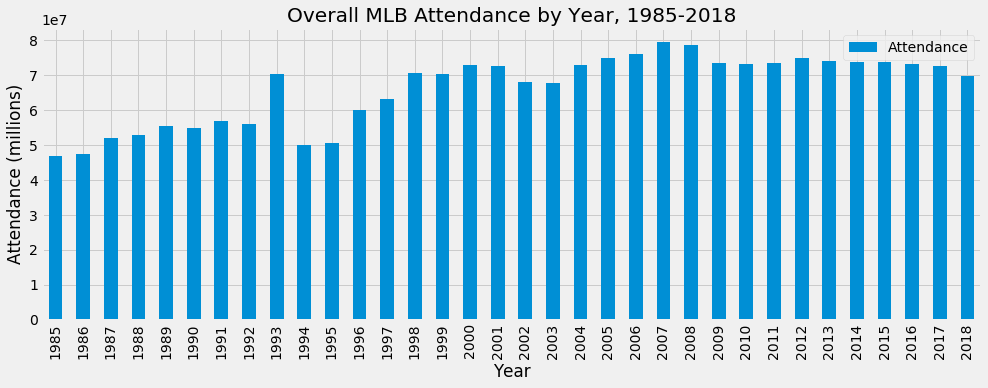

In [17]:
attendance_by_year = df[['Year','Attendance']].loc[
    (df['Home/Away']=='Home')].groupby(
    'Year').agg(
    {'Attendance':{'Attendance':'sum'}})
plt.style.use('fivethirtyeight') # adopts the fivethirtyeight plotting style
attendance_by_year['Attendance'].plot.bar(figsize=(15,5))
plt.ylabel('Attendance (millions)')
plt.title('Overall MLB Attendance by Year, 1985-2018')

Attendance increased from 1985 to 1993.  1994 and 1995 were shortened seasons as a result of an MLB players' strike, resulting in diminished attendance over those years.  After the strike, attendance continued to climb until reaching its peak in 2007, and has leveled off since then. 

Below is the attendance for each individual team over the entire period.

/Users/jonahlevavi/anaconda3/lib/python3.7/site-packages/pandas/core/groupby/groupby.py:4656: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


Text(0.5, 1.0, 'Overall Attendance by Team, 1985-2018')

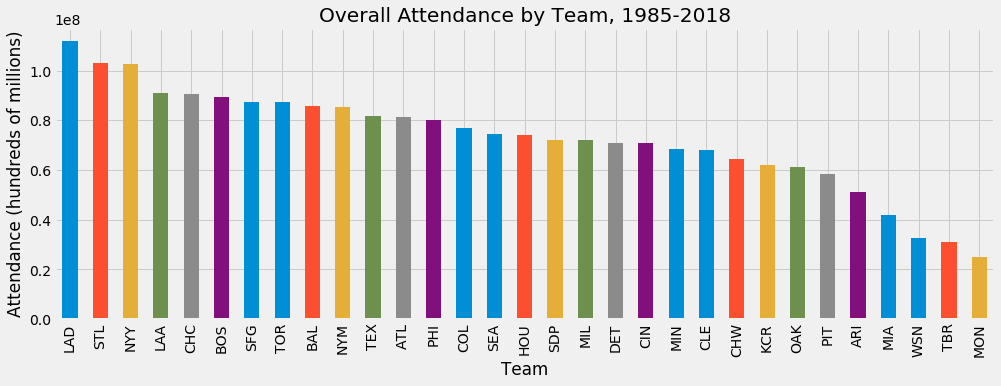

In [18]:
overall_team_attendance = df[['Year','Attendance','Team']].loc[
    (df['Home/Away']=='Home')].groupby(
    'Team').agg(
    {'Attendance':{'Attendance':'sum'}})['Attendance'].sort_values(
    'Attendance', ascending=False)
plt.style.use('fivethirtyeight')
overall_team_attendance['Attendance'].plot.bar(figsize=(15,5))
plt.ylabel('Attendance (hundreds of millions)')
plt.title('Overall Attendance by Team, 1985-2018')

The Dodgers led all teams in attendance between 1985 and 2018, followed by the Cardinals and the Yankees.  Unsurprisingly, the Expos, who ceased operating in 2003, have the lowest overall attendance figure over this period, followed by the  recent MLB expansion teams, including the Rays, Marlins, and Nationals.

Next we examine which team had the highest attendance in each individual year.

/Users/jonahlevavi/anaconda3/lib/python3.7/site-packages/pandas/core/groupby/groupby.py:4656: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


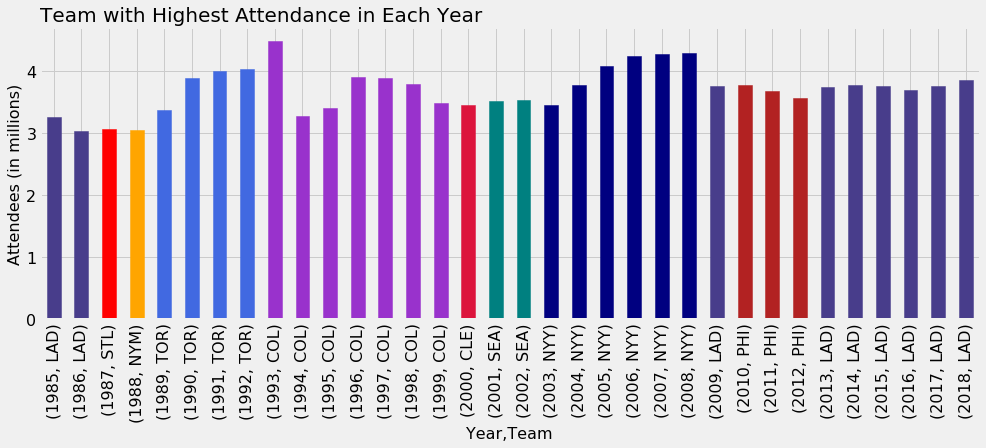

In [19]:
aggregations = {'Attendance':{'Attendance':'sum'}}

highest_att_pyear = df[['Year','Team','Attendance']].loc[
    (df['Home/Away']=='Home')].groupby(
    ['Year','Team']).agg(
    aggregations)['Attendance'].sort_values(
    ['Year','Attendance'], ascending=False) # selects the home team with highest attendance in each year

highest_att_pyear.reset_index(level=0, inplace=True)
highest_att_pyear['Team']=highest_att_pyear.index
highest_att_pyear.groupby('Year').agg({'Attendance':'first','Team':'first'})
df2 = highest_att_pyear.groupby('Year').agg({'Attendance':'first','Team':'first'}) # creates a new dataframe grouped by year
df2['Attendance'] = df2['Attendance']/10**6  # Converts to millions

fig, ax = plt.subplots() # sets up the plot
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(16)  # sets size of various plot components at 16

df3 = df2.reset_index().set_index(['Year','Team'])  # creates a new dataframe with Year and Team in the index
    
df3.plot(kind='bar', ax=ax, figsize=(15,5), legend=False)  # creates bar plot
ax.set_title('Team with Highest Attendance in Each Year', fontsize=20, loc='left')
ax.set_ylabel('Attendees (in millions)', fontsize=16)  

# Set specific colors for each team

dodgers_list = [0,1,24,28,29,30,31,32,33]
for i in dodgers_list:
    ax.get_children()[i].set_color('darkslateblue')

yankees_list = [18,19,20,21,22,23]
for i in yankees_list:
    ax.get_children()[i].set_color('navy')

philly_list = [25,26,27]
for i in philly_list:
    ax.get_children()[i].set_color('firebrick')

seattle_list = [16,17]
for i in seattle_list:
    ax.get_children()[i].set_color('teal')
      
colorado_list = [8,9,10,11,12,13,14]
for i in colorado_list:
    ax.get_children()[i].set_color('darkorchid')
    
toronto_list = [4,5,6,7]
for i in toronto_list:
    ax.get_children()[i].set_color('royalblue')
    
ax.get_children()[2].set_color('r') #st. louis
    
ax.get_children()[3].set_color('orange') #mets
    
ax.get_children()[15].set_color('crimson') #cleveland

Since 1985, the Dodgers have led the league in attendance in more years than any other team (9), followed by the Colorado Rockies (7) and New York Yankees (6).

When a team acheives the highest attendance in the league, the effect tends to be preceded by a major event and last for several years in a row.  For example, 1989 marked the opening of a new stadium for the Toronto Blue Jays and was the start of 4 years of the highest attendance in the league.  1993 was the Colorado Rockies' inaugural season, kicking off 7 years of leading the league in attendance.  In 2003, the Yankees again had the best league record, highlighted by pitcher Roger Clemens' 300th win and 4000th strikeout.  This was the start 6 years of the Yankees leading league attendance.  In 2012, the LA Dodgers were sold for a record $2 billion to Magic Johnson and his associates, immediately preceding a 6-year period of highest league attendance that began in 2013.

Next we examine how attendance changes over the course of an MLB season:

Text(0.5, 1.0, 'Mean Attendance by Game Number, 1985-2018')

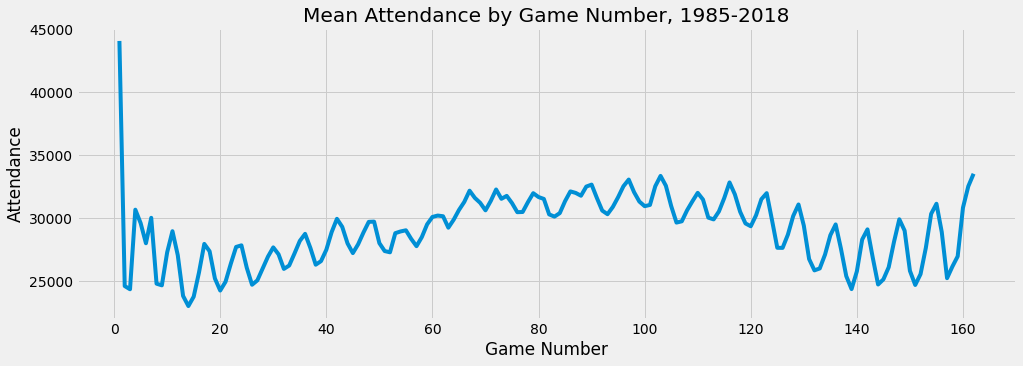

In [20]:
attendance_by_game = df[['Game_No','Attendance']].loc[
    (df['Home/Away']=='Home')&(df['Game_No']<163)].groupby(
    'Game_No').agg(
    {'Attendance':{'Attendance':'mean'}})['Attendance'].sort_values(
    'Game_No', ascending=True)
plt.style.use('fivethirtyeight')
attendance_by_game['Attendance'].plot(figsize=(15,5))
plt.ylabel('Attendance')
plt.xlabel('Game Number')
plt.title('Mean Attendance by Game Number, 1985-2018')

The first game of the season sees, on average, nearly 40% higher attendance than any other game.  Attendance gradually increases through the middle of the season, which coincides with the summer months, and then decreases again towards the Fall.

In addition to this overall trend, attendance appears to observe a consistent wave-like pattern throughout a given season, which is attributable to attendance variations among different days of the week, as illustrated below:

/Users/jonahlevavi/anaconda3/lib/python3.7/site-packages/pandas/core/groupby/groupby.py:4656: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


Text(0.5, 1.0, 'Mean Attendance by Day of the Week, 1985-2018')

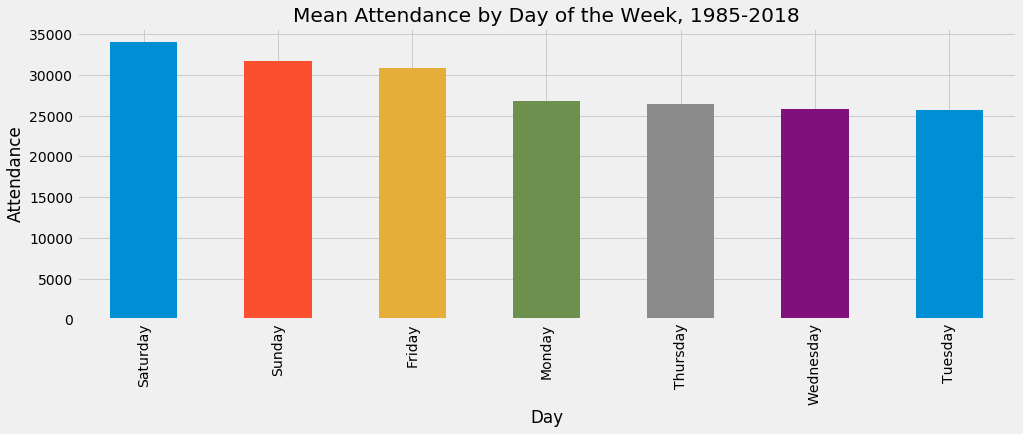

In [21]:
overall_day_attendance = df[['Year','Attendance','Day']].loc[
    (df['Home/Away']=='Home')].groupby(
    'Day').agg(
    {'Attendance':{'Attendance':'mean'}})['Attendance'].sort_values(
    'Attendance', ascending=False)
overall_day_attendance['Attendance'].plot.bar(figsize=(15,5))
plt.ylabel('Attendance')
plt.title('Mean Attendance by Day of the Week, 1985-2018')

As we would expect, weekends see higher average attendance than weekdays. In addition, attendance varies based on the time of day at which games are held:

Text(0.5, 0.98, 'Overall Attendance by Time of Day (Day versus Night), 1985-2018')

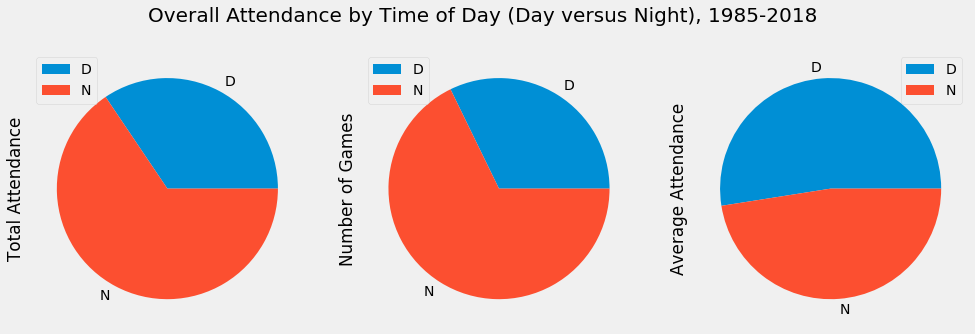

In [22]:
attendance_by_ToD = df[['D/N','Attendance']].loc[
    (df['Home/Away']=='Home')].groupby(
    'D/N').agg(
    {'Attendance':{'Total Attendance':'sum','Number of Games':'count','Average Attendance':'mean'}})['Attendance']

attendance_by_ToD.plot.pie(subplots='True',figsize=(15,5))
plt.suptitle('Overall Attendance by Time of Day (Day versus Night), 1985-2018',fontsize=20)

As the first pie chart shows, more of the attendance between 1985 and 2018 was attributable to night games than day games.  However, as the second pie chart shows, there are also far more night games than day games over a given season. As the third pie chart shows, on average, day games actually saw higher attendance than night games.

Next we examine the evolution of MLB offense since 1985.

Text(0.5, 0, 'Year')

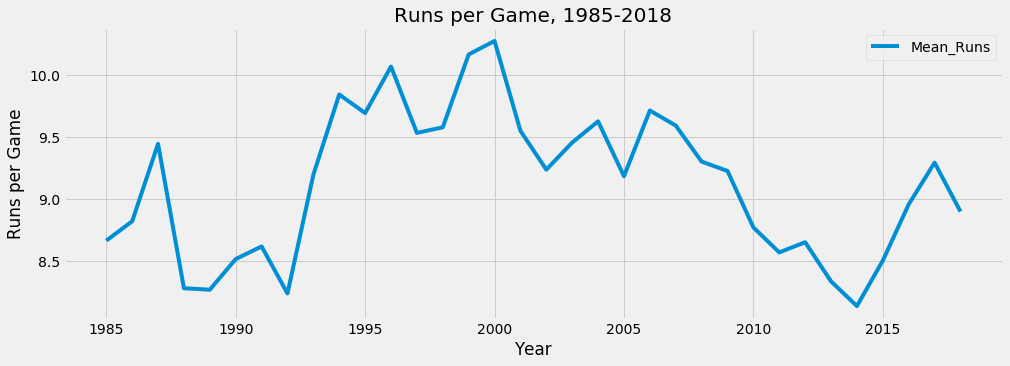

In [23]:
df['Total_Runs']=df['Runs']+df['Runs_Allowed']

runs_per_year = df[['Year','Total_Runs']].loc[
    (df['Home/Away']=='Home')].groupby(
    'Year').agg(
    {'Total_Runs':{'Mean_Runs':'mean'}})['Total_Runs']

runs_per_year.plot(figsize=(15,5))
plt.title('Runs per Game, 1985-2018',fontsize=20)
plt.ylabel('Runs per Game')
plt.xlabel('Year')

Offense increased markedly between 1994 and 2002, a period commonly referred to as the 'steroid era'.  After the MLB implemented steroid testing in 2003, offense began to decline, eventually reaching its lowest level in 2014.  Offense crept back up steadily between 2015 and 2017 before declining again in 2018. 

Despite the lack of an overall trend in offense over the period, games have consistently grown longer:

Text(0.5, 0, 'Year')

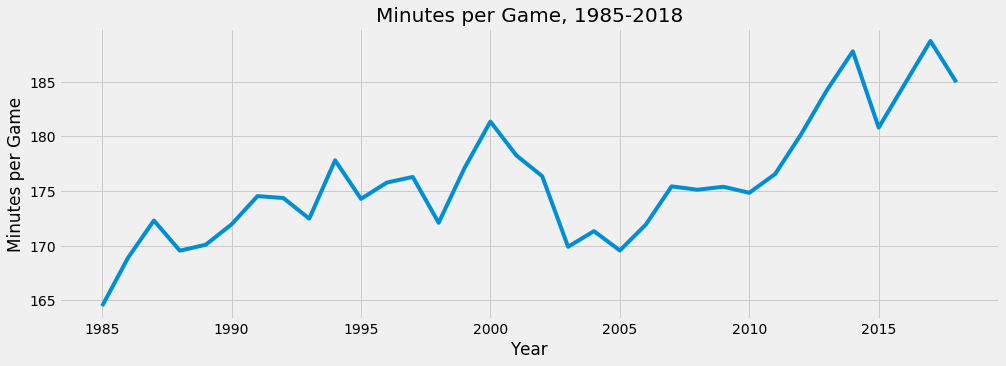

In [24]:
mean_gametime = df[['Year','Total_Minutes']].loc[
    (df['Home/Away']=='Home')].groupby(
    'Year').agg(
    {'Total_Minutes':{'Average_Time':'mean'}})['Total_Minutes']

mean_gametime.plot(figsize=(15,5), legend=False)
plt.title('Minutes per Game, 1985-2018',fontsize=20)
plt.ylabel('Minutes per Game')
plt.xlabel('Year')

Games times have increased from an average of 164 minutes in 1985 to 184 minutes in 2018. 

We would generally expect that the length of a given game is positively associated with the number of runs scored.  To analyze this relationship, we regress the time of each game against the number of runs scored. 

First, we examine a histogram of every game time in the database:

(array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00,
        1.2000e+01, 4.0000e+00, 1.8000e+01, 1.4000e+01, 3.2000e+01,
        4.2000e+01, 5.6000e+01, 1.2000e+02, 2.6200e+02, 6.1600e+02,
        1.2540e+03, 2.2700e+03, 3.6020e+03, 5.6880e+03, 7.6500e+03,
        9.8500e+03, 1.1636e+04, 1.2550e+04, 1.3448e+04, 1.3364e+04,
        1.2738e+04, 1.1518e+04, 9.8600e+03, 8.4500e+03, 6.8420e+03,
        5.4980e+03, 4.2720e+03, 3.2700e+03, 2.5460e+03, 1.7980e+03,
        1.4060e+03, 1.0740e+03, 8.0400e+02, 6.4600e+02, 5.7200e+02,
        4.0600e+02, 3.5200e+02, 3.3600e+02, 2.4800e+02, 2.0400e+02,
        2.1000e+02, 1.1600e+02, 1.3200e+02, 1.4400e+02]),
 array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
        130, 135, 140, 145, 150, 155, 160, 165, 

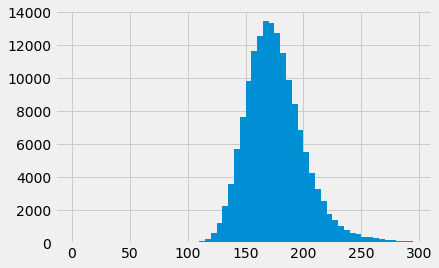

In [25]:
plt.hist(df['Total_Minutes'], bins=range(0,300,5))

As the histogram shows, the distribution of game times has a long-right tail. We therefore apply a log-transformation to normalize the variable before running the regression.

In [26]:
df['log_Total_Minutes']=np.log(df['Total_Minutes'])

import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

print(smf.ols('log_Total_Minutes~Total_Runs',data=df).fit().summary())

                            OLS Regression Results                            
Dep. Variable:      log_Total_Minutes   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.192
Method:                 Least Squares   F-statistic:                 3.724e+04
Date:                Wed, 15 May 2019   Prob (F-statistic):               0.00
Time:                        13:21:30   Log-Likelihood:                 93125.
No. Observations:              156538   AIC:                        -1.862e+05
Df Residuals:                  156536   BIC:                        -1.862e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.0292      0.001   6668.512      0.0

The F-statistic indicates that the regression is highly significant.  The R^2 value indicates that 19.2% of the variations in game time are explained by variations in the number of runs scored.  Exponentiating the coefficient (because it is a log-linear model) indicates that each additional run scored is associated with a 10^.0143=1.033=3.3% increase in game time.

Finally, we explore whether certain teams are prone to playing longer games than others:

/Users/jonahlevavi/anaconda3/lib/python3.7/site-packages/pandas/core/groupby/groupby.py:4656: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


(170, 185)

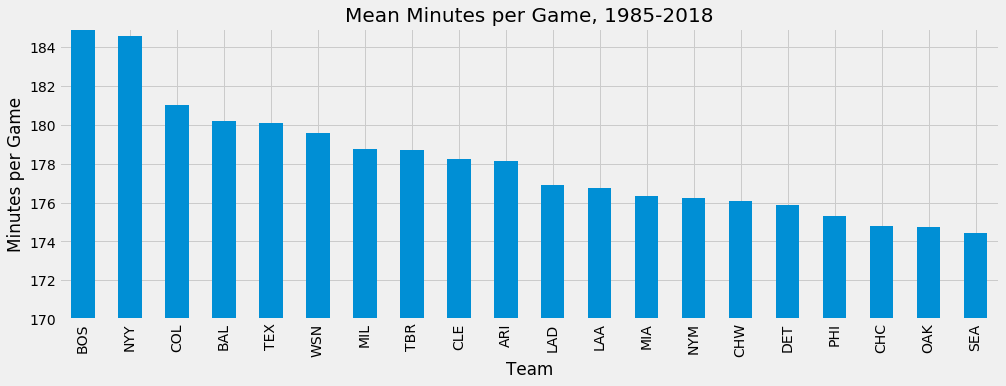

In [27]:
mean_gametime_by_team = df[['Year','Total_Minutes','Team']].loc[
    (df['Home/Away']=='Home')].groupby(
    'Team').agg(
    {'Total_Minutes':{'Average_Time':'mean'}})['Total_Minutes'].sort_values(
    'Average_Time', ascending=False).head(20)

mean_gametime_by_team.plot.bar(figsize=(15,5), legend=False)
plt.title('Mean Minutes per Game, 1985-2018',fontsize=20)
plt.ylabel('Minutes per Game')
plt.xlabel('Team')
plt.ylim([170, 185])

The Red Sox and Yankees lead with roughly 185 minutes each per game.  It is unclear, however, whether the differences in average game time among teams are statistically significant.  We analyze this question using an ANOVA regression. 

In [29]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

lm = ols('log_Total_Minutes ~ C(Team)',data=df).fit()
table = sm.stats.anova_lm(lm, typ=2) 
print(table)

               sum_sq        df          F  PR(>F)
C(Team)     52.781654      30.0  81.001997     0.0
Residual  3399.380546  156507.0        NaN     NaN


The F-statistic is highly significant, indicating that there are in fact significant differences in average game time among the teams in the dataset.